In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pyarrow

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

sns.set_style("white")
plt.rcParams['figure.dpi'] = 300

In [2]:
file_path = r'C:\Users\wziller\Milwaukee Tool\_Global AME\MSOE\CS5610\M6\csc5610base\GroupProjectM6\eng_stats_df.feather'
eng_stats_df = pd.read_feather(file_path)

In [3]:
eng_stats_df.head(20)

,playerID,HallOfFame_df_inducted,Batting_df_G_avg,Batting_df_G_total,Batting_df_AB_avg,Batting_df_AB_total,Batting_df_R_avg,Batting_df_R_total,Batting_df_H_avg,Batting_df_H_total,...,BattingPost_df_IBB_avg,BattingPost_df_IBB_total,BattingPost_df_HBP_avg,BattingPost_df_HBP_total,BattingPost_df_SH_avg,BattingPost_df_SH_total,BattingPost_df_SF_avg,BattingPost_df_SF_total,BattingPost_df_GIDP_avg,BattingPost_df_GIDP_total
0,gomezle01,False,26.285714,368,64.571429,904,4.214286,59,9.500000,133,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
12320,gehrilo01,False,86.941176,1478,57.823529,983,77.411765,1316,53.235294,905,...,1.0,17,0.0,0,1.0,17,0.0,0,0.0,0
18270,gehrich01,False,94.894737,1803,73.684211,1400,88.000000,1672,63.947368,1215,...,0.0,0,0.0,0,1.0,19,0.0,0,0.0,0
29214,dykesji01,False,94.090909,2070,67.909091,1494,50.363636,1108,78.818182,1734,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
29940,cronijo01,False,85.000000,1700,45.350000,907,61.650000,1233,65.550000,1311,...,0.0,0,0.0,0,0.0,0,0.0,0,1.0,20
34340,simmoal01,False,68.500000,1370,64.100000,1282,71.350000,1427,59.800000,1196,...,0.0,0,0.0,0,0.0,0,1.0,20,0.0,0
53660,ruthba01,True,94.045455,2069,54.727273,1204,77.363636,1702,59.318182,1305,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
60920,averiea01,False,90.076923,1171,75.692308,984,66.923077,870,55.538462,722,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
62152,crowdal01,False,31.454545,346,65.272727,718,5.090909,56,12.818182,141,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0
62572,dickebi01,False,87.588235,1489,63.647059,1082,54.705882,930,95.117647,1617,...,1.0,17,1.0,17,0.0,0,0.0,0,1.0,17


In [4]:
X = eng_stats_df[['Batting_df_G_avg', 'Batting_df_G_total', 'Batting_df_AB_avg', 'Batting_df_AB_total', 'Batting_df_R_avg', 'Batting_df_R_total', 'Batting_df_H_avg', 'Batting_df_H_total', 'Batting_df_2B_avg', 'Batting_df_2B_total', 'Batting_df_3B_avg', 'Batting_df_3B_total', 'Batting_df_HR_avg', 'Batting_df_HR_total', 'Batting_df_RBI_avg', 'Batting_df_RBI_total', 'Batting_df_SB_avg', 'Batting_df_SB_total', 'Batting_df_CS_avg', 'Batting_df_CS_total', 'Batting_df_BB_avg', 'Batting_df_BB_total', 'Batting_df_SO_avg', 'Batting_df_SO_total', 'Batting_df_IBB_avg', 'Batting_df_IBB_total', 'Batting_df_HBP_avg', 'Batting_df_HBP_total', 'Batting_df_SH_avg', 'Batting_df_SH_total', 'Batting_df_SF_avg', 'Batting_df_SF_total', 'Batting_df_GIDP_avg', 'Batting_df_GIDP_total', 'BattingPost_df_G_avg', 'BattingPost_df_G_total', 'BattingPost_df_AB_avg', 'BattingPost_df_AB_total', 'BattingPost_df_R_avg', 'BattingPost_df_R_total', 'BattingPost_df_H_avg', 'BattingPost_df_H_total', 'BattingPost_df_2B_avg', 'BattingPost_df_2B_total', 'BattingPost_df_3B_avg', 'BattingPost_df_3B_total', 'BattingPost_df_HR_avg', 'BattingPost_df_HR_total', 'BattingPost_df_RBI_avg', 'BattingPost_df_RBI_total', 'BattingPost_df_SB_avg', 'BattingPost_df_SB_total', 'BattingPost_df_CS_avg', 'BattingPost_df_CS_total', 'BattingPost_df_BB_avg', 'BattingPost_df_BB_total', 'BattingPost_df_SO_avg', 'BattingPost_df_SO_total', 'BattingPost_df_IBB_avg', 'BattingPost_df_IBB_total', 'BattingPost_df_HBP_avg', 'BattingPost_df_HBP_total', 'BattingPost_df_SH_avg', 'BattingPost_df_SH_total', 'BattingPost_df_SF_avg', 'BattingPost_df_SF_total', 'BattingPost_df_GIDP_avg', 'BattingPost_df_GIDP_total']]
y = eng_stats_df['HallOfFame_df_inducted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model_1 = SVC(kernel='poly')
svm_model_1.fit(X_train_scaled, y_train)

y_pred = svm_model_1.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[89  0]
 [ 8  3]]

Classification Report:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96        89
        True       1.00      0.27      0.43        11

    accuracy                           0.92       100
   macro avg       0.96      0.64      0.69       100
weighted avg       0.93      0.92      0.90       100



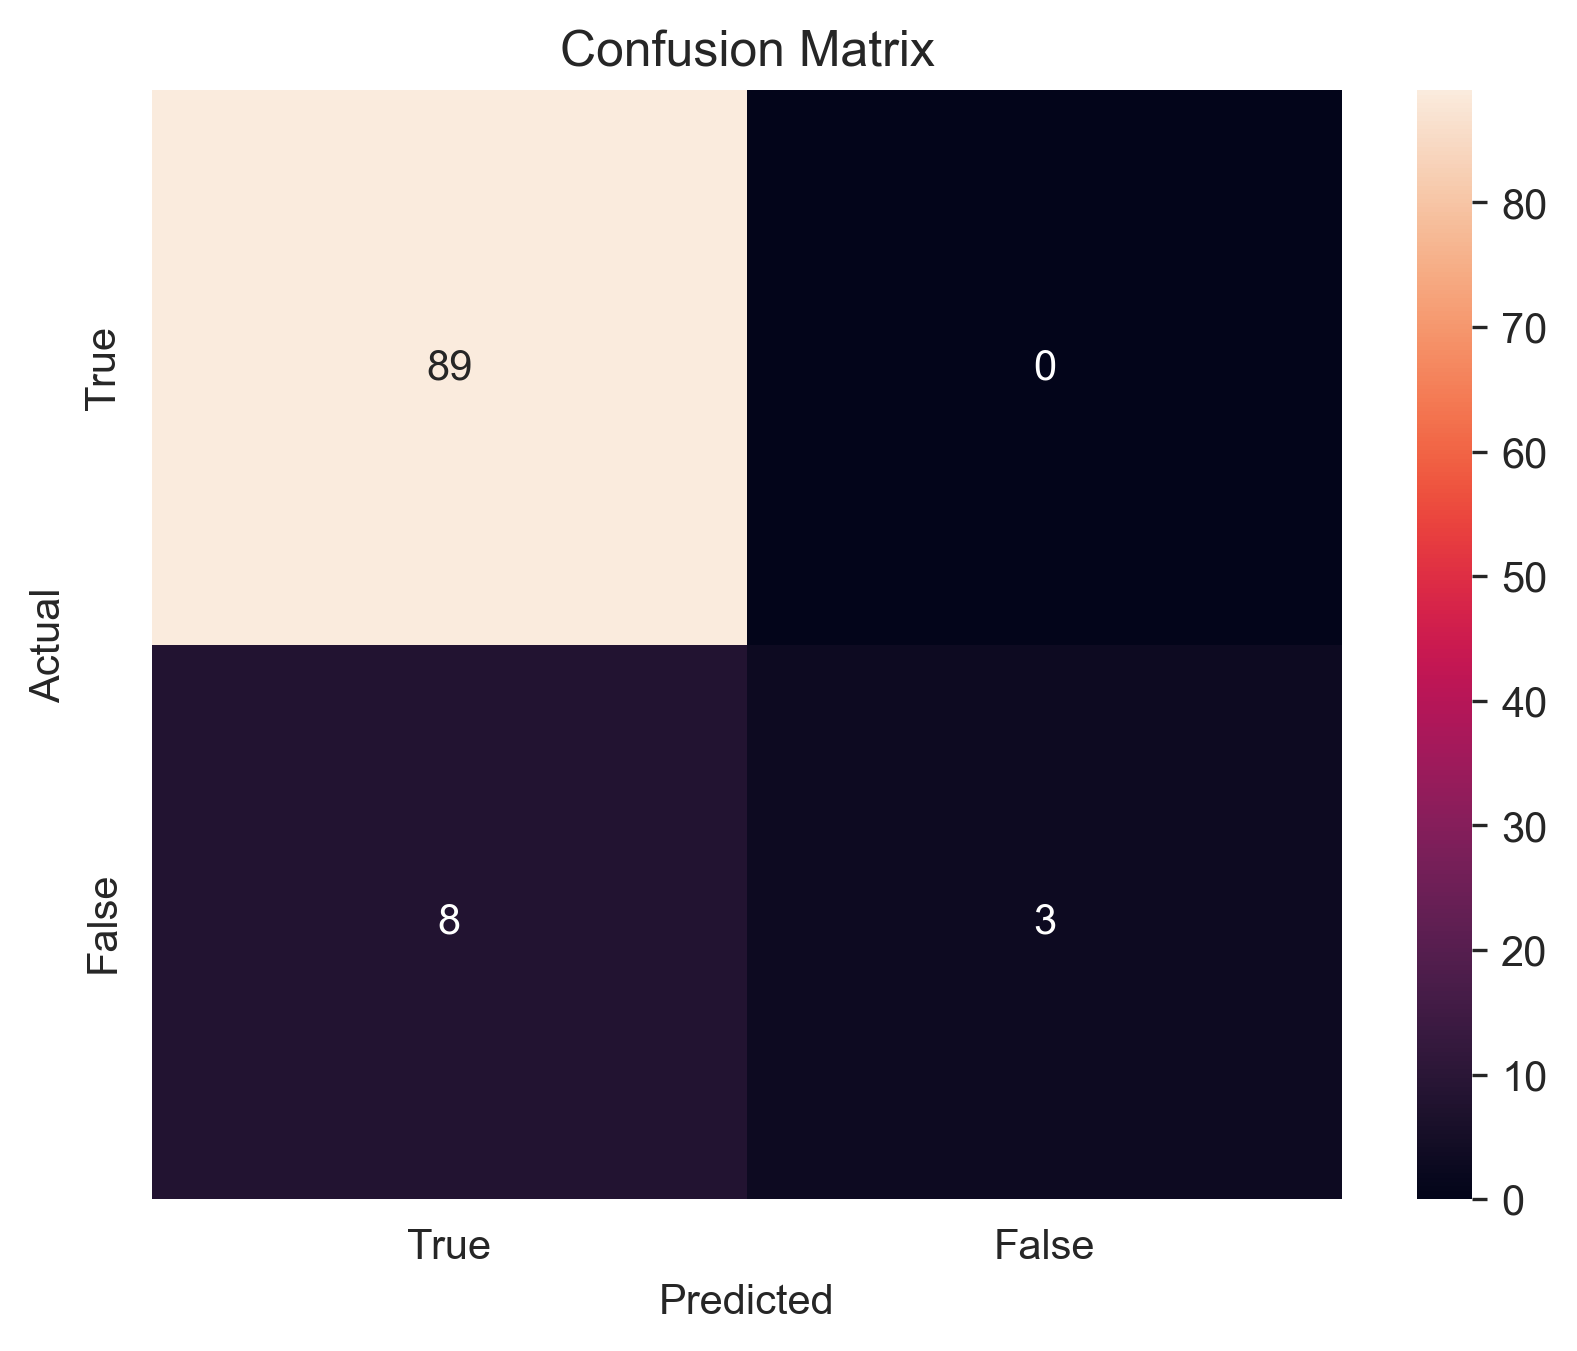

<Figure size 1920x1440 with 0 Axes>

In [5]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=['True', 'False'], yticklabels=['True', 'False'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

plt.savefig('svm_model_1.png')